# PROJECT : HEART DISEASE PREDICTION 

# 1. Import libraries

In [67]:
#Libraries (for data manupulation and visulization)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Libraries (for data cleaning or preprocessiing)
from sklearn.preprocessing import StandardScaler

#Libraries (for model selection)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Libraries (for implement model)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Libraries (for evaluting accuracy and results)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# 2.Load the dataset

In [68]:
df = pd.read_csv("C://Users//windows 10//PROJECTS//Heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3.Explotary data analysis(EDA)

## Display basic information

In [69]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [74]:
#first five rows of dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1]:
#target values count(0 and 1)
df['target'].value_counts()

NameError: name 'df' is not defined

## Target value count using bar plot

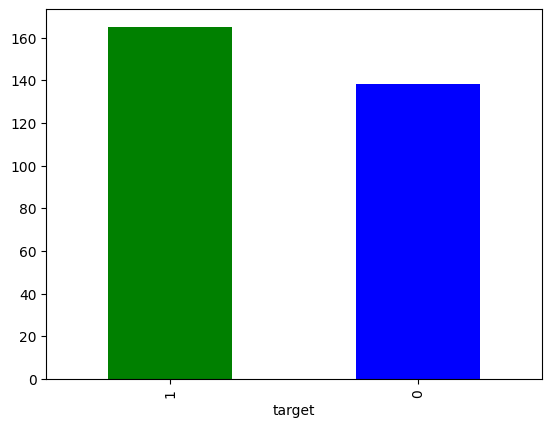

In [77]:
#target value count using bar plot
df['target'].value_counts().plot(kind='bar',color=['green', 'blue'])
plt.savefig('bar graph value count new.png')
plt.show()

In [73]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


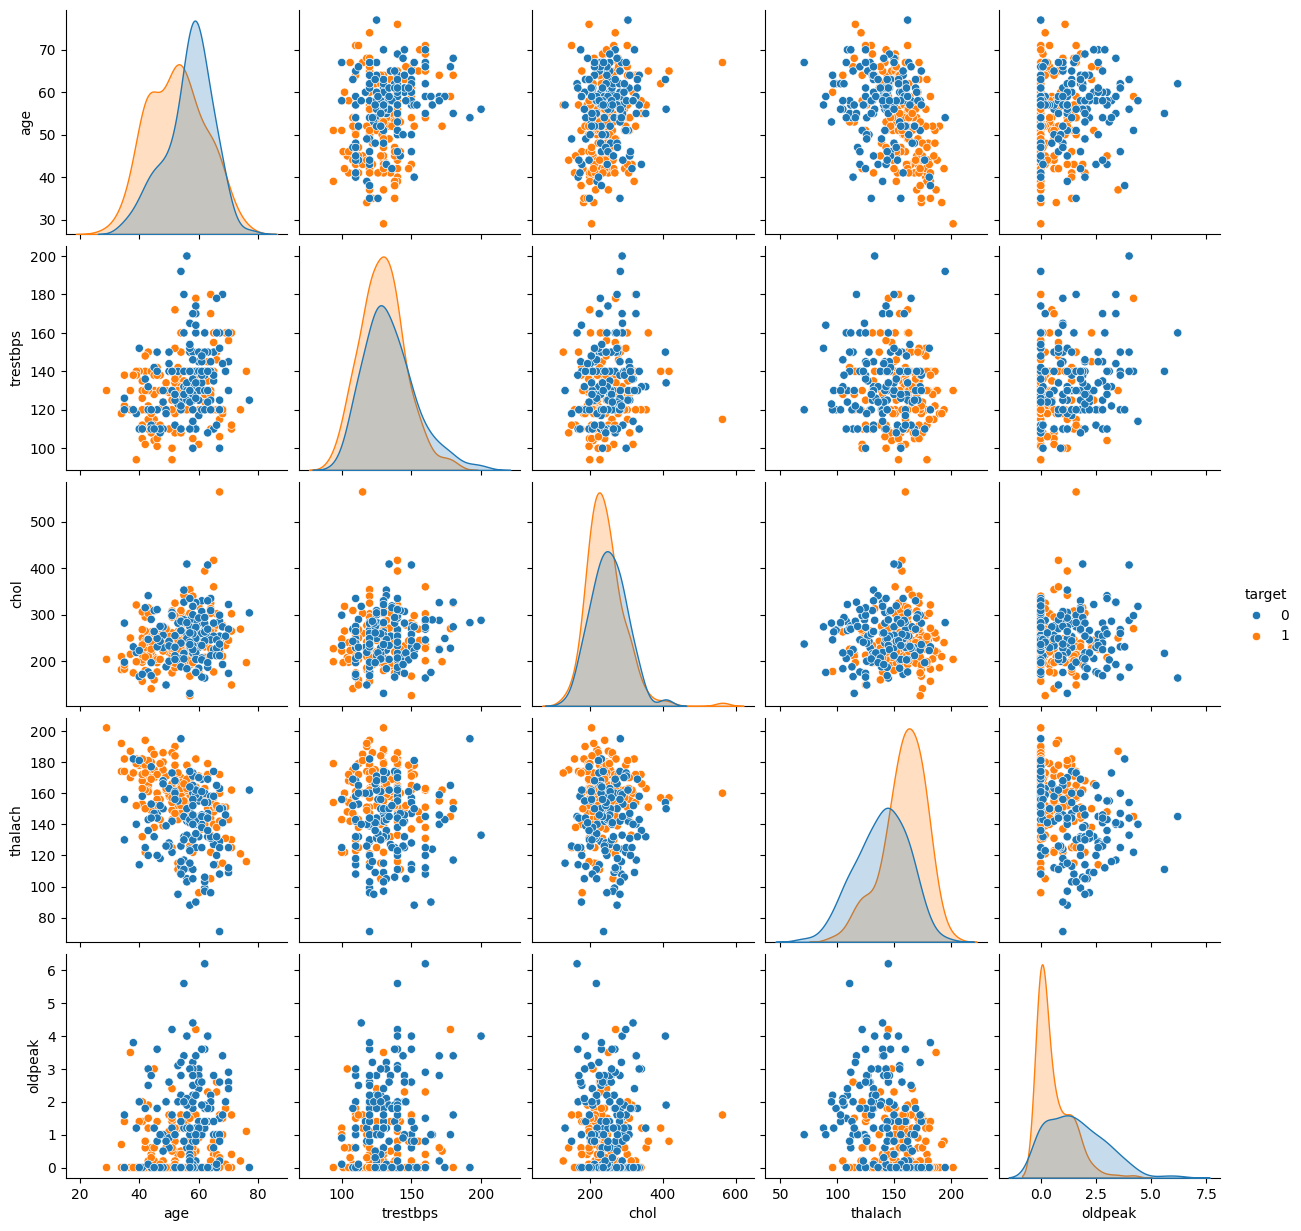

In [78]:
#Pairplot: Visualizing pairwise relationships between key features. The exploratory data analysis involved 
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[key_features], hue='target', diag_kind='kde')
plt.savefig('pairplotnew.png')
plt.show()

## Data visualization

### 1. Target Variable Distribution

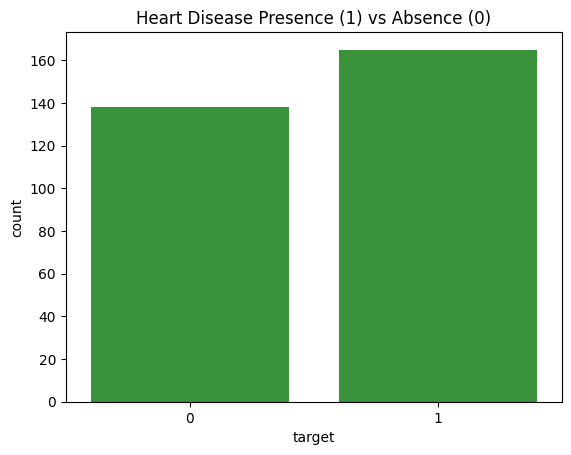

In [81]:
sns.countplot(x='target', data=df,%colors=['c','b'])
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.savefig('countplot0and1.png')
plt.show()

### 2. Histograms of Features

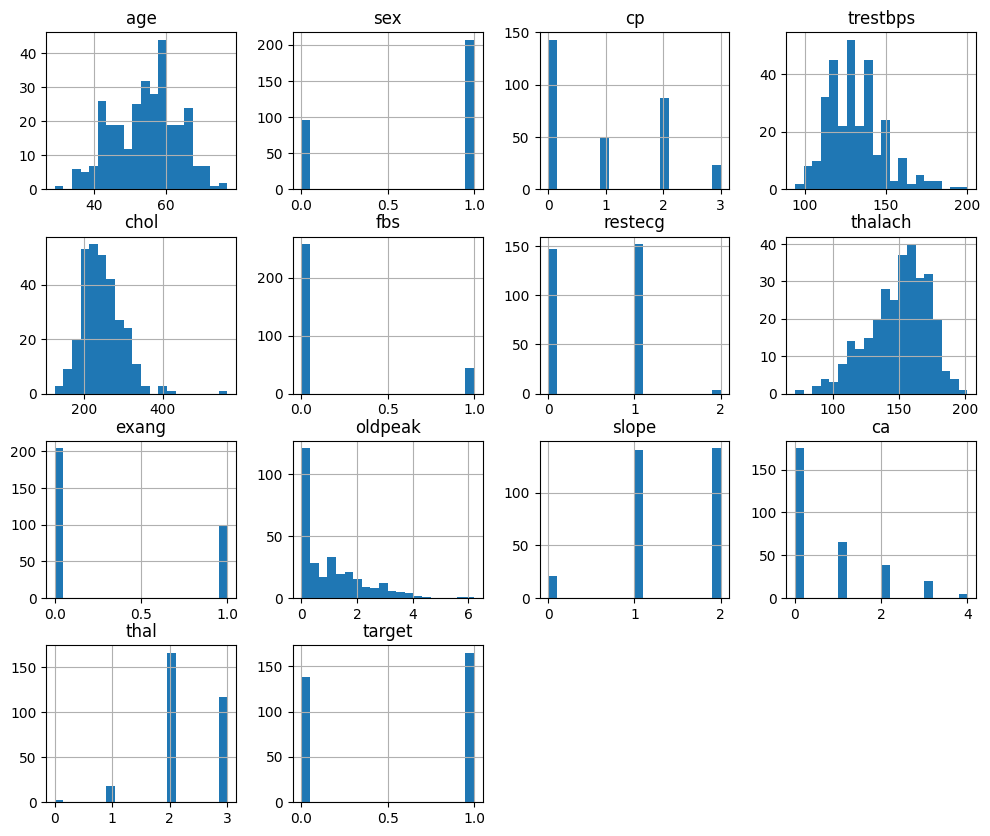

In [82]:
df.hist(figsize=(12, 10), bins=20)
plt.savefig('histogram_new.png')
plt.show()

### 3. Correlation Heatmap

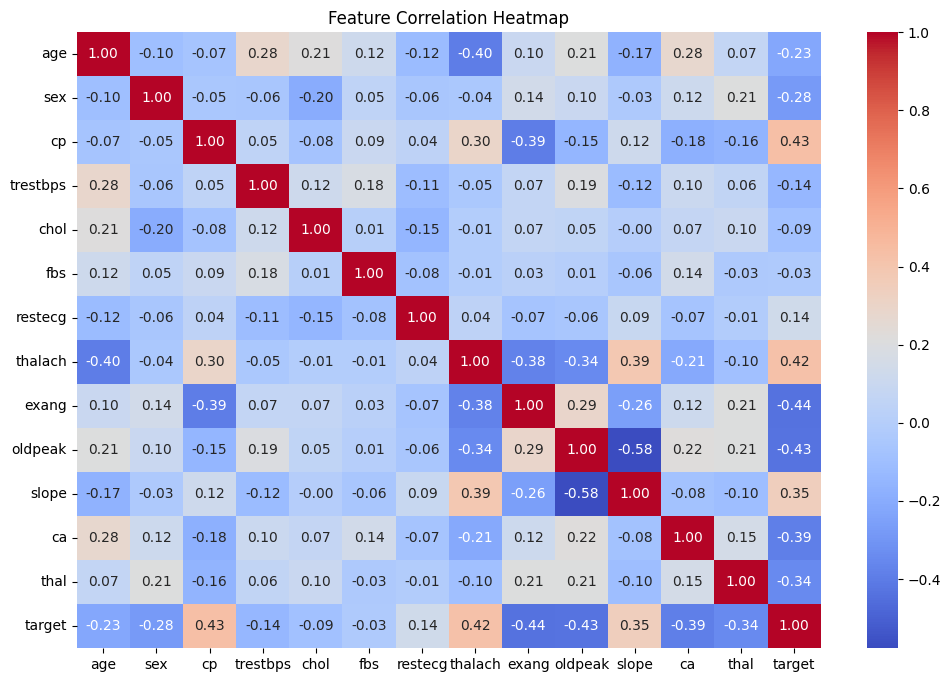

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig('correlation_heatmap.png')
plt.show()


### 4. Boxplots for Outlier Detection

In [1]:
#for column in df.select_dtypes(include=np.number).columns:
    #plt.figure(figsize=(6, 4))
    #sns.boxplot(x=df[column])
    #plt.title(f"Boxplot for {column}")
    #plt.show()

#### Box plot before removing outliers

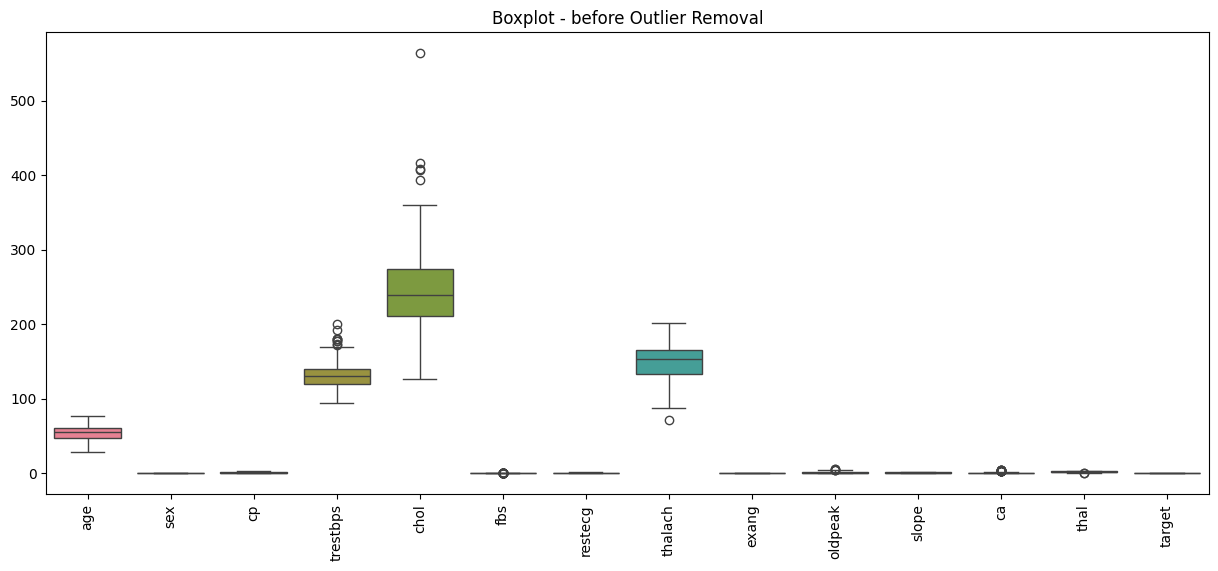

In [86]:
# Boxplot before removing outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot - before Outlier Removal')
plt.savefig('boxplotbefore outlier removal.png')

plt.show()


## Check the accuracy of model with outliers

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Split the data into training and testing sets

In [29]:
# splitting
X = df.drop('target', axis=1)
y = df['target']
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
len(X_train), len(y_train)

(242, 242)

### Make  the model for check the accuracy 
#### In which use following algorithms for check the accuracy 
#### "Logistic Regression":
#### "KNN":
#### "Random Forest":
#### desicision tree

In [31]:
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
knn = KNeighborsClassifier()

# Train models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)

C:\Users\windows 10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [32]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predict on test data
y_pred_log = log_reg.predict(X_test)
y_pred_tree = dec_tree.predict(X_test)
y_pred_forest = rand_forest.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Performance metrics function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance Report for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

# Evaluate models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_forest, "Random Forest")
evaluate_model(y_test, y_pred_knn, "knn")


Performance Report for Logistic Regression
Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

AUC-ROC Score: 0.8841594827586207

Performance Report for Decision Tree
Accuracy: 0.819672131147541
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

AUC-ROC Score: 0.8232758620689656

Performance Report for Random Forest
Accuracy: 0.8524590163934426
Classification Report:
 

### SVC model accuracy check

In [33]:
from sklearn.svm import SVC
from sklearn import metrics
svc= SVC(kernel='linear')
 # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 
svc.fit(X_train,y_train)
 
y_pred_svc = svc.predict(X_test)
 
print("Accuracy of svc classifier :: ", metrics.accuracy_score(y_test,y_pred_svc))

Accuracy of svc classifier ::  0.8688524590163934


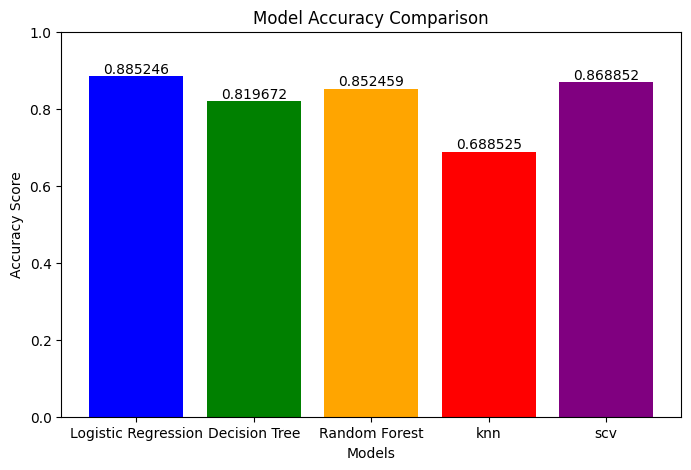

In [87]:
#Acuracy graph
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Collect accuracy scores for each model
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_forest),
    "knn":accuracy_score(y_test, y_pred_knn),
    "scv": metrics.accuracy_score(y_test,y_pred_svc)
}

# Plotting the accuracy chart
fig, ax = plt.subplots(figsize=(8, 5))
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create bar chart

ax.bar(models, scores, color=['blue', 'green', 'orange','red','purple'])
ax.set_title('Model Accuracy Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_ylim(0, 1)
ax.bar_label(ax.containers[0])
plt.savefig('model_accuracy_comparision_with_outliers.png')

# Display the plot
plt.show()

# Data preprocessing and Data cleaning

## Checking for null values

In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### IF the null value exists then we fill by using this : 

In [37]:
df.fillna(df.median(), inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Check for duplicate values

In [38]:
# Count total duplicate rows
duplicates_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates_count}")

Total duplicate rows: 1


### Remove duplicate if exists

In [39]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Confirm removal
print(f"Total duplicate rows after cleaning: {df_cleaned.duplicated().sum()}")

Total duplicate rows after cleaning: 0


### Saved the clean file

In [40]:
df_cleaned.to_csv('cleaned_heart_disease_data.csv', index=False)

In [41]:
df1=pd.read_csv('cleaned_heart_disease_data.csv')
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## checkiing for encoding

### Checking numerical columns


In [42]:
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## removing outliers

### > Use the IQR method to remove the outliers

In [52]:
#Remove the outlier
#calculate IQR
q3=df1['trestbps'].quantile(.75)
q3
q1=df1['trestbps'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df1['trestbps']>=ul)
#lower limit
lower=np.where(df1['trestbps']<=ll)
#delete the rows above and below lower values
df1.drop(upper[0],inplace=True)
df1.drop(lower[0],inplace=True)
#shape how many rows removed
df1.shape
#first convert trestbps value in array
arr=df1['trestbps'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df1['trestbps'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df1['trestbps'].values[false_index] = mid
df1

170.0 90.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [57]:
#Remove the outlier
#calculate IQR
q3=df1['chol'].quantile(.75)
q3
q1=df1['chol'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df1['chol']>=ul)
#lower limit
lower=np.where(df1['chol']<=ll)
#delete the rows above and below lower values
df1.drop(upper[0],inplace=True)
df1.drop(lower[0],inplace=True)
#shape how many rows removed
df1.shape
#first convert cholvalue in array
arr=df1['chol'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df1['chol'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df1['chol'].values[false_index] = mid
df1

358.625 119.625


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
#Remove the outlier
#calculate IQR
q3=df1['thalach'].quantile(.75)
q3
q1=df1['thalach'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df1['thalach']>=ul)
#lower limit
lower=np.where(df1['thalach']<=ll)
#delete the rows above and below lower values
df1.drop(upper[0],inplace=True)
df1.drop(lower[0],inplace=True)
#shape how many rows removed
df1.shape
#first convert fbs value in array
arr=df1['thalach'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df2['thalach'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df2['thalach'].values[false_index] = mid
df2

218.5 80.5


KeyError: '[236] not found in axis'

In [58]:
#Remove the outlier
#calculate IQR
q3=df1['thal'].quantile(.75)
q3
q1=df1['thal'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df1['thal']>=ul)
#lower limit
lower=np.where(df1['thal']<=ll)
#delete the rows above and below lower values
df1.drop(upper[0],inplace=True)
df1.drop(lower[0],inplace=True)
#shape how many rows removed
df1.shape
#first convert trestbps value in array
arr=df1['thal'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df1['thal'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df1['thal'].values[false_index] = mid
df1

4.5 0.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Boxplot after removing the outliers

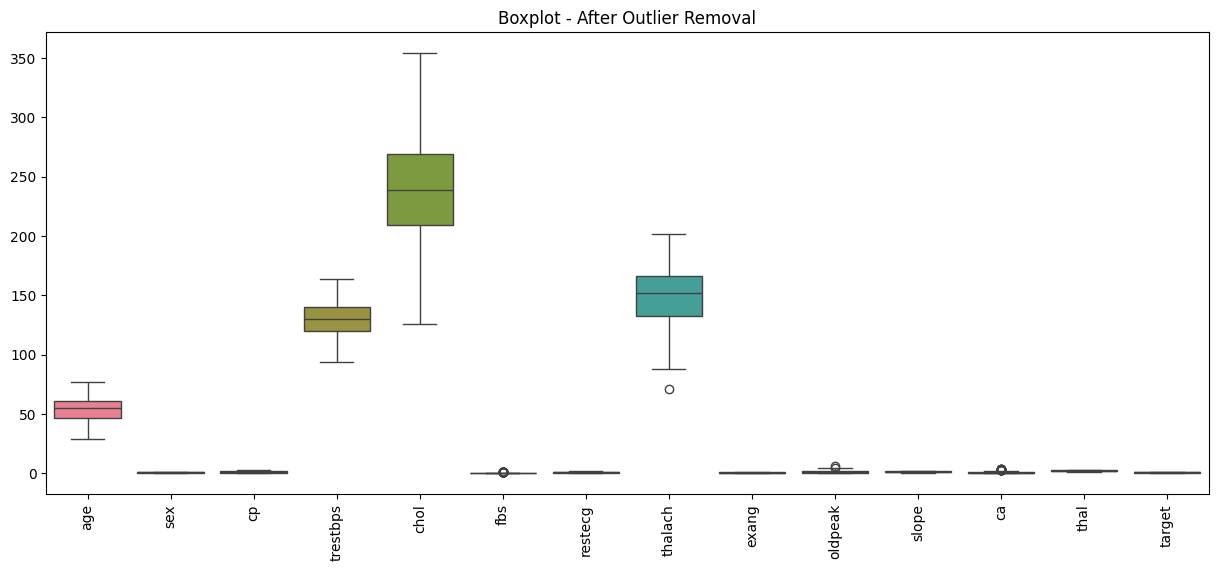

In [88]:
# Checking if there are any remaining outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.title('Boxplot - After Outlier Removal')
plt.savefig('boxplot_after_outliers_removal.png')
plt.show()

### Standardization

In [60]:
# # Assuming 'target' is the label column
X_clean = df1.drop('target', axis=1)
y_clean = df1['target']

# # Feature scaling
scaler = StandardScaler()
X_clean= scaler.fit_transform(X_clean)

In [61]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

## Alorithms are used to find the accuracy of cleaned data

### > SVC for calculate the accuracy

In [62]:
from sklearn.svm import SVC
from sklearn import metrics
svc= SVC(kernel='linear')
 # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 
svc.fit(X_train_clean,y_train_clean)
 
y_pred_svc_clean = svc.predict(X_test_clean)
 
print("Accuracy of svc classifier :: ", metrics.accuracy_score(y_test_clean,y_pred_svc_clean))

Accuracy of svc classifier ::  0.8867924528301887


#### In which use following algorithms for check the accuracy 
#### "Logistic Regression":
#### "KNN":
#### "Random Forest":

In [63]:
# Train the model

log_reg_clean = LogisticRegression()
dec_tree_clean = DecisionTreeClassifier()
rand_forest_clean = RandomForestClassifier()
knn_clean = KNeighborsClassifier()

# Train models
log_reg_clean.fit(X_train_clean, y_train_clean)
dec_tree_clean.fit(X_train_clean, y_train_clean)
rand_forest_clean.fit(X_train_clean, y_train_clean)
knn_clean.fit(X_train_clean, y_train_clean)

KNeighborsClassifier()

In [64]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predict on test data
y_pred_log_clean = log_reg_clean.predict(X_test_clean)
y_pred_tree_clean = dec_tree_clean.predict(X_test_clean)
y_pred_forest_clean = rand_forest_clean.predict(X_test_clean)
y_pred_knn_clean = knn_clean.predict(X_test_clean)

# Performance metrics function
def evaluate_model1(y_test_clean, y_pred_clean, model_name):
    print(f"\nPerformance Report for {model_name}")
    print("Accuracy:", accuracy_score(y_test_clean, y_pred_clean))
    print("Classification Report:\n", classification_report(y_test_clean, y_pred_clean))
    print("AUC-ROC Score:", roc_auc_score(y_test_clean, y_pred_clean))

# Evaluate models
evaluate_model1(y_test_clean, y_pred_log_clean, "Logistic Regression")
evaluate_model1(y_test_clean, y_pred_tree_clean, "Decision Tree")
evaluate_model1(y_test_clean, y_pred_forest_clean, "Random Forest")
evaluate_model1(y_test_clean, y_pred_knn_clean, "knn")


Performance Report for Logistic Regression
Accuracy: 0.8679245283018868
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.90      0.88      0.89        32

    accuracy                           0.87        53
   macro avg       0.86      0.87      0.86        53
weighted avg       0.87      0.87      0.87        53

AUC-ROC Score: 0.8660714285714286

Performance Report for Decision Tree
Accuracy: 0.6226415094339622
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.55        21
           1       0.70      0.66      0.68        32

    accuracy                           0.62        53
   macro avg       0.61      0.61      0.61        53
weighted avg       0.63      0.62      0.63        53

AUC-ROC Score: 0.6138392857142857

Performance Report for Random Forest
Accuracy: 0.8867924528301887
Classification Report:


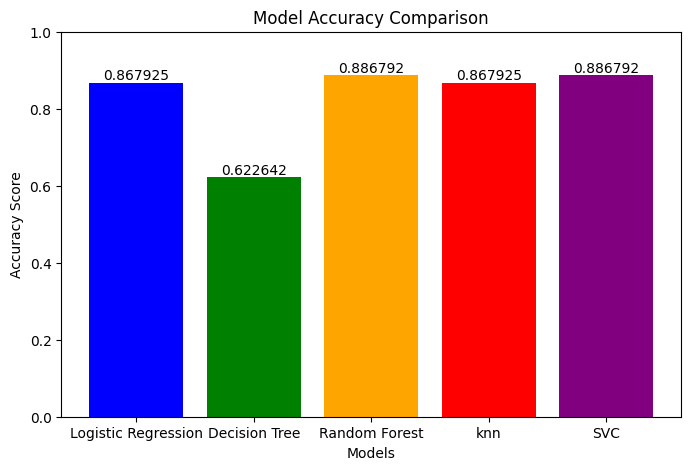

In [89]:
#Acuracy graph
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Collect accuracy scores for each model
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test_clean, y_pred_log_clean),
    "Decision Tree": accuracy_score(y_test_clean, y_pred_tree_clean),
    "Random Forest": accuracy_score(y_test_clean, y_pred_forest_clean),
    "knn":accuracy_score(y_test_clean, y_pred_knn_clean),
    "SVC": metrics.accuracy_score(y_test_clean,y_pred_svc_clean)
}

# Plotting the accuracy chart
fig, ax = plt.subplots(figsize=(8, 5))
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create bar chart
ax.bar(models, scores, color=['blue', 'green', 'orange','red','purple'])
ax.set_title('Model Accuracy Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_ylim(0, 1)
ax.bar_label(ax.containers[0])
plt.savefig('model accuracy comparison_new.png')

# Display the plot
plt.show()


## Compare the model accuracy on the basis of before remove outliers and after remove outliers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Accuracy scores BEFORE cleaning
accuracy_scores_before = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_forest),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVC": metrics.accuracy_score(y_test, y_pred_svc)
}

# Accuracy scores AFTER cleaning
accuracy_scores_after = {
    "Logistic Regression": accuracy_score(y_test_clean, y_pred_log_clean),
    "Decision Tree": accuracy_score(y_test_clean, y_pred_tree_clean),
    "Random Forest": accuracy_score(y_test_clean, y_pred_forest_clean),
    "KNN": accuracy_score(y_test_clean, y_pred_knn_clean),
    "SVC": metrics.accuracy_score(y_test_clean, y_pred_svc_clean)
}

# Plotting
labels = list(accuracy_scores_before.keys())
before_scores = list(accuracy_scores_before.values())
after_scores = list(accuracy_scores_after.values())

x = np.arange(len(labels))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, before_scores, width, label='Before Cleaning', color='gray')
bars2 = ax.bar(x + width/2, after_scores, width, label='After Cleaning', color='skyblue')

# Labels, titles, and formatting
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy Comparison Before vs After Data Cleaning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()

# Add value labels to bars
ax.bar_label(bars1, fmt='%.2f', padding=3)
ax.bar_label(bars2, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig('model accuracy before and after data claning_new.png')
plt.show()


NameError: name 'y_test' is not defined